In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image 

In [2]:
objp = np.zeros((10*7,3), np.float32)
objp[:,:2] = np.mgrid[0:10, 0:7].T.reshape(-1,2)
objp *= 19

In [3]:
folder_right = "1080p_stereo_calib/right/"
folder_left = "1080p_stereo_calib/left/"

In [7]:
K_l = np.array([[1572.21759392,    0.        ,  921.46909424],
       [   0.        , 1568.02105297,  437.08755814],
       [   0.        ,    0.        ,    1.        ]])

K_r = np.array([[1562.8844672 ,    0.        , 1003.36066189],
       [   0.        , 1558.88689229,  448.76868195],
       [   0.        ,    0.        ,    1.        ]])

dist_l = np.array([[-0.37090124,  0.2319178 , -0.00026621, -0.00059378, -0.11590811]])
dist_r = np.array([[-0.36810567,  0.22406853, -0.00049262, -0.00003734, -0.1056876 ]])

## Stereo

In [5]:
obj_pts = []
img_pts_l, img_pts_r = [], []

for fname_l, fname_r in zip(sorted(os.listdir(folder_left)), sorted(os.listdir(folder_right))):

    print(f"processing {fname_l, fname_r}")
    img_l, img_r = Image.open(folder_left + fname_l), Image.open(folder_right + fname_r)
    arr_l, arr_r = np.array(img_l), np.array(img_r)
    gray_l, gray_r = cv2.cvtColor(arr_l, cv2.COLOR_RGB2GRAY), cv2.cvtColor(arr_r, cv2.COLOR_RGB2GRAY)

    flags = cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_NORMALIZE_IMAGE + cv2.CALIB_CB_FAST_CHECK
    ret_l, corners_l = cv2.findChessboardCorners(gray_l, (10,7), flags)
    ret_r, corners_r = cv2.findChessboardCorners(gray_r, (10,7), flags)

    if ret_l and ret_r:
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
        corners_subpix_l = cv2.cornerSubPix(gray_l, corners_l, (11,11), (-1,-1), criteria)
        corners_subpix_r = cv2.cornerSubPix(gray_r, corners_r, (11,11), (-1,-1), criteria)

        obj_pts.append(objp)
        img_pts_l.append(corners_subpix_l)
        img_pts_r.append(corners_subpix_r)

processing ('001.png', '001.png')
processing ('002.png', '002.png')
processing ('003.png', '003.png')
processing ('004.png', '004.png')
processing ('005.png', '005.png')
processing ('006.png', '006.png')
processing ('007.png', '007.png')
processing ('008.png', '008.png')
processing ('009.png', '009.png')
processing ('010.png', '010.png')
processing ('011.png', '011.png')
processing ('012.png', '012.png')
processing ('013.png', '013.png')
processing ('014.png', '014.png')
processing ('015.png', '015.png')
processing ('016.png', '016.png')


In [8]:
flags = 0
flags |= cv2.CALIB_FIX_INTRINSIC

criteria_stereo= (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)


# This step is performed to transformation between the two cameras and calculate Essential and Fundamenatl matrix
retS, K_l, dist_l, K_r, dist_r, Rot, Trns, Emat, Fmat = cv2.stereoCalibrate(
    obj_pts,
    img_pts_l,
    img_pts_r,
    K_l, dist_l,
    K_r, dist_r,
    gray_l.shape[::-1],
    criteria_stereo,
    flags)

In [9]:
rect_l, rect_r, proj_mat_l, proj_mat_r, Q, roiL, roiR = cv2.stereoRectify(K_l, dist_l, K_r, dist_r, gray_l.shape[::-1], Rot, Trns, 1 ,(0,0))

In [10]:
left_stereo_maps = cv2.initUndistortRectifyMap(K_l, dist_l, rect_l, proj_mat_l,
                                             gray_l.shape[::-1], cv2.CV_16SC2)
right_stereo_maps = cv2.initUndistortRectifyMap(K_r, dist_r, rect_r, proj_mat_r,
                                              gray_l.shape[::-1], cv2.CV_16SC2)

In [11]:
arr_l_rect = cv2.remap(arr_l, left_stereo_maps[0],left_stereo_maps[1], cv2.INTER_LANCZOS4, cv2.BORDER_CONSTANT, 0)
arr_r_rect = cv2.remap(arr_r, right_stereo_maps[0],right_stereo_maps[1], cv2.INTER_LANCZOS4, cv2.BORDER_CONSTANT, 0)

Images L: 001.png, R: 001.png


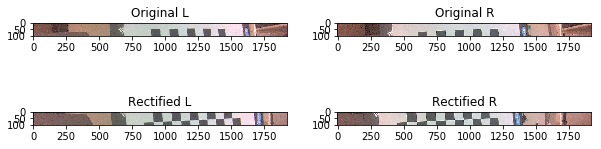

Images L: 002.png, R: 002.png


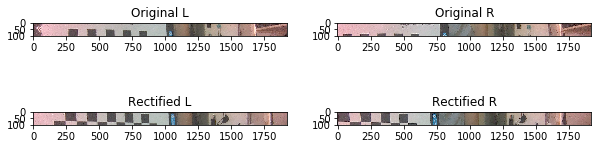

Images L: 003.png, R: 003.png


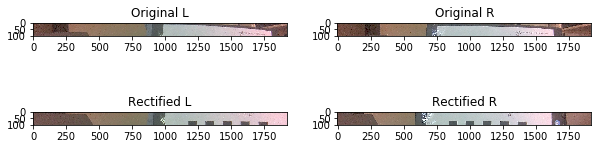

Images L: 004.png, R: 004.png


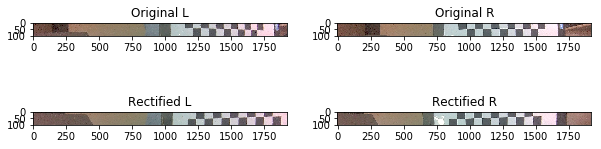

Images L: 005.png, R: 005.png


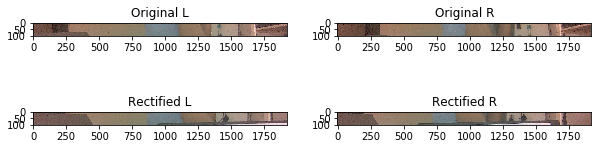

Images L: 006.png, R: 006.png


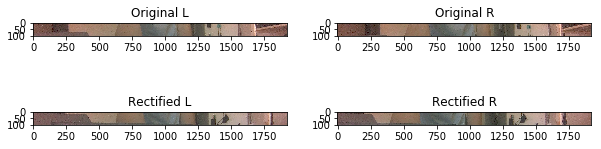

Images L: 007.png, R: 007.png


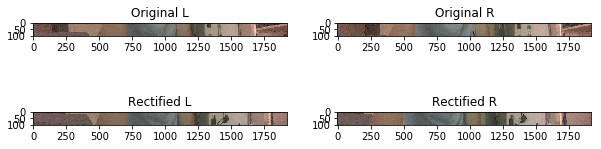

Images L: 008.png, R: 008.png


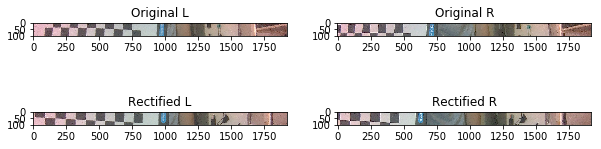

Images L: 009.png, R: 009.png


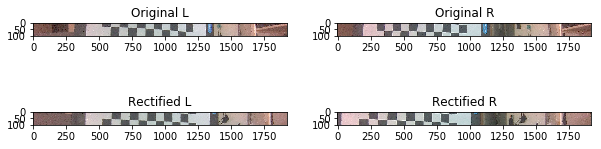

Images L: 010.png, R: 010.png


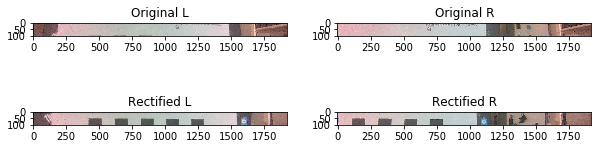

Images L: 011.png, R: 011.png


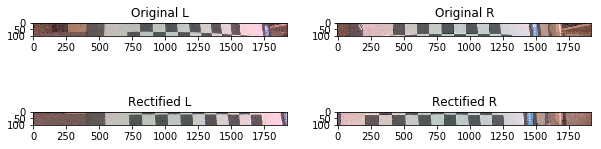

Images L: 012.png, R: 012.png


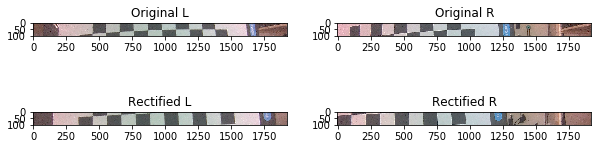

Images L: 013.png, R: 013.png


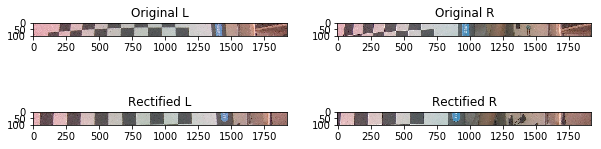

Images L: 014.png, R: 014.png


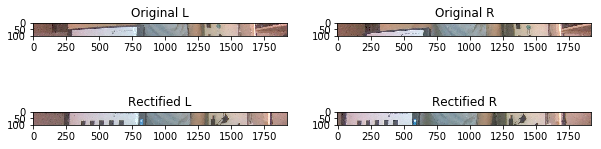

Images L: 015.png, R: 015.png


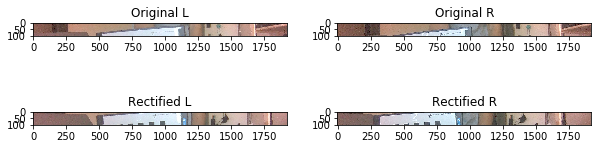

Images L: 016.png, R: 016.png


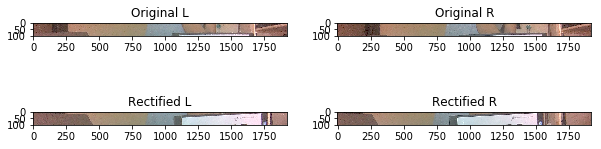

In [12]:
for fname_l, fname_r in zip(sorted(os.listdir(folder_left)), sorted(os.listdir(folder_right))):
    
    print(f"Images L: {fname_l}, R: {fname_r}")

    img_l, img_r = Image.open(folder_left + fname_l), Image.open(folder_right + fname_r)
    arr_l, arr_r = np.array(img_l), np.array(img_r)
    
    arr_l_rect = cv2.remap(arr_l, left_stereo_maps[0],left_stereo_maps[1], cv2.INTER_LANCZOS4, cv2.BORDER_CONSTANT, 0)
    arr_r_rect = cv2.remap(arr_r, right_stereo_maps[0],right_stereo_maps[1], cv2.INTER_LANCZOS4, cv2.BORDER_CONSTANT, 0)
    
    fig, [(ax1, ax2), (ax3, ax4)] = plt.subplots(2, 2, figsize=(10,3))
    
    # before
    ax1.imshow(arr_l[100:200,:])
    ax2.imshow(arr_r[100:200,:])
    
    ax1.title.set_text('Original L')
    ax2.title.set_text('Original R')

    
    # after
    ax3.imshow(arr_l_rect[100:200,:])
    ax4.imshow(arr_r_rect[100:200,:])
    
    ax3.title.set_text('Rectified L')
    ax4.title.set_text('Rectified R')
    plt.show()

### Save undistort+recity map

In [11]:
cv_file = cv2.FileStorage("rectify_prarams.yaml", cv2.FILE_STORAGE_WRITE)
cv_file.write("map_l_x", left_stereo_maps[0])
cv_file.write("map_l_y", left_stereo_maps[1])
cv_file.write("map_r_x", right_stereo_maps[0])
cv_file.write("map_r_y", right_stereo_maps[1])
cv_file.release() 